#1. Mount Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Jul 16 07:36 data_202001.csv
-rw------- 1 root root    314682 Jul 16 07:43 data_202002.csv
-rw------- 1 root root    335953 Jul 16 07:56 data_202003.csv
-rw------- 1 root root    988308 Jul 16 08:03 data_2020.csv
-rw------- 1 root root 783889122 Jul 15 09:11 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jul 15 09:15 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jul 15 09:19 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,549 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
#Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [18]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [10]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계시

In [6]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [7]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [8]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [9]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [10]:
# Store index of data_06_22 counting into x
x = data_06_22_counting.index

In [11]:
labels = [str(i)+'시' for i in x]

In [12]:
labels

['14시',
 '12시',
 '15시',
 '13시',
 '11시',
 '10시',
 '16시',
 '17시',
 '9시',
 '18시',
 '8시',
 '19시',
 '20시',
 '7시',
 '21시',
 '22시',
 '6시']

In [15]:
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
# Store values of data_06_22_counting into values
values = data_06_22_counting.values

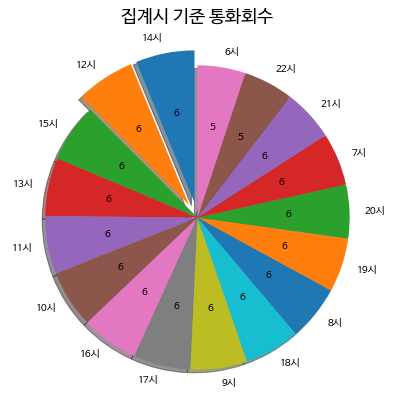

In [19]:
# Configure figure size
plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(values, explode=explode, labels=labels, startangle= 90, shadow=True, autopct='%.lf')
# Generate labels and title
plt.title('집계시 기준 통화회수', fontsize=18)
# show plot
plt.show()

#5. **도착영업소코드**

In [20]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [21]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [22]:
# Store index of data_destination counting into x
x = data_destination_counting.index

In [23]:
labels = [str(i) for i in x]

In [24]:
labels

['105', '110', '115', '140', '130', '135', '125', '120']

In [25]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '부산', '동김천', '경주', '남구미', '황간']

In [26]:
explode = [0.2, 0.1, 0, 0, 0, 0, 0, 0]

In [27]:
# Store values of data_destination_counting into values
values = data_destination_counting.values

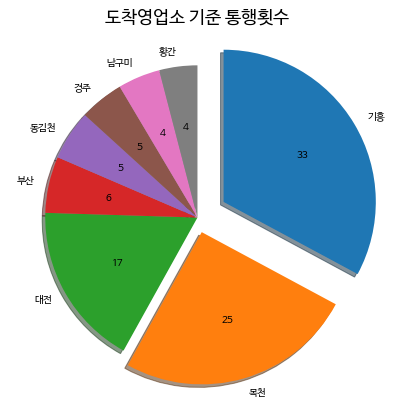

In [28]:
# Configure figure size
plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(values, explode=explode, labels=labels, startangle= 90, shadow=True, autopct='%.lf', counterclock=False)
# Generate labels and title
plt.title('도착영업소 기준 통행횟수', fontsize=18)
# show plot
plt.show()